# 1 Introduction
This python notebook is for Amazon food reviews polarity prediction based on the given review data by applying Naive Bayes algorithm which is based on Bayes probability model. To build generalized prediction model first step should be necessary cleaning of data as a part of data preprocessing. 

We will perform following data preprocessing. 

* Removing Stop-words
* Remove any punctuations or limited set of special characters like , or . or # etc.
* Snowball Stemming the word 
* Convert the word to lowercase
 
Once we the data is cleaned to be processed we'll use below Feature generation techniques to convert text to numeric vector.
1. Bag Of Words (BoW)
1. Term Frequency - inverse document frequency (tf-idf)

Using Naive Bayes algorithm we will build model to predict review polarity for each technique. 

**Objective:** Given a review determine whether a review is positive or negative, by appling Naive Bayes algorithm and deciding the best Feature generation technique with most important features for positive & negative class. We will generate ROC curve for each model to check the sensibility of model

**Note:** As word2vec generate vector with negative valuel we can not use it for Naive Bays algorithm as it accepts positive values only as a imput vector.





**1.1 Load and check data**

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn


In [4]:

df = pd.read_csv('data_set_amazon.csv')
df.head()

,review,class
0,watch for the song no me queda mas by far the ...,Acompanhado
1,a final precious gift from roy to his fans i ...,Acompanhado
2,like a cat dragged in from the rain depeche mo...,Acompanhado
3,folk/rock country/rock what a great artist. d...,Acompanhado
4,"one of my very favorite ""sing along"" albums if...",Acompanhado


# 2 Data Preprocessing

*  **Segregating data as positive and negative**

* **Sorting data for time based splitting for model train and test dataset**

<AxesSubplot:>

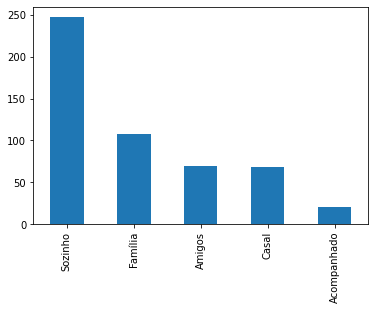

In [7]:
df['class'].value_counts().plot(kind='bar')

* ** Removing Stop-words **
* ** Remove any punctuations or limited set of special characters like , or . or # etc. **
* ** Snowball Stemming the word ** 
* ** Convert the word to lowercase **

# 3 Building function to find optimal Alpha for Naive Bayes

**To Find the optimal alpha we will used cross validation method. Based on misclassifiction error for with different alpha, we will decide the best alpha on Train Data**

In [11]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)


NameError: name 'X_res' is not defined

# 4 Feature generation techniques to convert text to numeric vector.[](http://) 

# 4.1 Appling Naive Bayes with BoW

**Generating Bag of Wrods Vector matrix for Reviews**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#count_vect = CountVectorizer(ngram_range=(1,2) ) 
count_vect = CountVectorizer() 
final_bow_count = count_vect.fit_transform(final_string)#final['Text'].values)

In [9]:
from sklearn.preprocessing import StandardScaler

final_bow_np = StandardScaler(with_mean=False).fit_transform(final_bow_count )


**Splitting Data into Train and Test based on the timestamp of review**

In [10]:
#We already have sorted data by timestamp so we will use first 70% of data as Train with cross validation and next 30% for test
import math
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split


X = final_bow_np
y = final['Score']

X_train =  final_bow_np[:math.ceil(len(final)*.7)] 
X_test = final_bow_np[math.ceil(len(final)*.7):]
y_train = y[:math.ceil(len(final)*.7)]
y_test =  y[math.ceil(len(final)*.7):]

**Finding Optimal alpha Cross validation**


The optimal alpha is  0.00041000000000000005
the misclassification error for each k value is :  [0.246 0.246 0.246 0.246 0.246 0.246 0.246 0.246 0.246 0.246 0.246 0.246
 0.246 0.246 0.246 0.246 0.246 0.246 0.246 0.246]
0.00041000000000000005


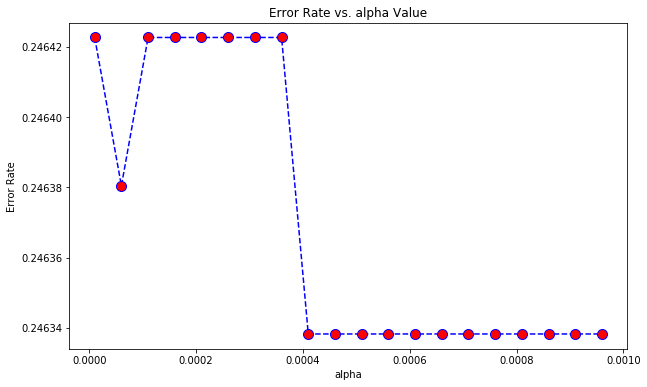

In [11]:
from sklearn.naive_bayes import MultinomialNB

myList = np.arange(0.00001, 0.001, 0.00005) #list(range(1,200))
optimal_alpha = find_optimal_k(X_train ,y_train,myList)

print(optimal_alpha)

**Naive Bayes with Optimal alpha**

In [12]:
nb = MultinomialNB(alpha = optimal_alpha)
model = nb.fit(X_train, y_train)


In [13]:
predbow = (model.predict(X_test))

In [14]:
predbowprob = model.predict_proba(X_test)

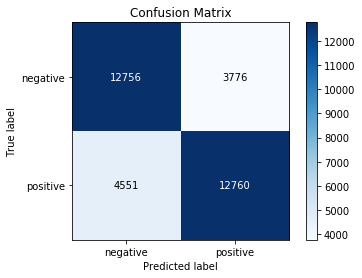

In [15]:
skplt.plot_confusion_matrix(y_test ,predbow)

In [16]:
print(classification_report(y_test ,predbow))

             precision    recall  f1-score   support

   negative       0.74      0.77      0.75     16532
   positive       0.77      0.74      0.75     17311

avg / total       0.75      0.75      0.75     33843



In [17]:
print("Accuracy for Naive Bayes model with Bag of Words is ",round(accuracy_score(y_test ,predbow),3))

Accuracy for Naive Bayes model with Bag of Words is  0.754


**Feature Importance**

In [18]:
bow_feat = count_vect.get_feature_names()

In [19]:
y_train.value_counts()

positive    44101
negative    34867
Name: Score, dtype: int64

In [20]:
model.class_count_ 

array([34867., 44101.])

In [21]:
df = pd.DataFrame(model.feature_log_prob_,columns=bow_feat)
df1_transposed = df.T

In [22]:
fe_bow_neg = df1_transposed[0].sort_values(ascending = False)[0:10] ##Negative
fe_bow_pos =df1_transposed[1].sort_values(ascending = False)[0:10] ##Positive

**Top 10 words found in Negative reviews with high probability**

In [23]:
fe_bow_neg

tast         -6.501355
like         -6.573567
product      -6.686227
would        -6.717131
one          -6.794408
tri          -6.825815
buy          -6.837410
disappoint   -6.847691
even         -6.928847
dont         -6.935310
Name: 0, dtype: float64

**Top 10 words found in Positive reviews with high probability**

In [24]:
fe_bow_pos

great    -6.462558
love     -6.518587
good     -6.585568
like     -6.734240
make     -6.787050
tast     -6.813155
use      -6.828327
one      -6.841952
flavor   -6.845137
best     -6.848862
Name: 1, dtype: float64

In [25]:
from sklearn.preprocessing import label_binarize
# Binarize the output
y_bow = label_binarize(y_test, classes= ["negative","positive","x"])[:,:-1]
n_classes = y_bow.shape[1]

In [26]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bow[:, i], predbowprob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bow.ravel(), predbowprob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

from scipy import interp
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 4.2 Appling Naive Bayes with tf-idf

**Generating tf-idf Vector matrix for Reviews**

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer()#ngram_range=(2,2))

final_tfidf_count = tf_idf_vec.fit_transform(final_string)#final['Text'].values)

#print(final_string)

In [28]:
from sklearn.preprocessing import StandardScaler

final_tfidf_np = StandardScaler(with_mean=False).fit_transform(final_tfidf_count )


**Splitting Data into Train and Test**

In [29]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

X = final_tfidf_np
y = final['Score']

X_train =  final_tfidf_np[:math.ceil(len(final)*.7)] 
X_test = final_tfidf_np[math.ceil(len(final)*.7):]
y_train = y[:math.ceil(len(final)*.7)]
y_test =  y[math.ceil(len(final)*.7):]


**Finding Optimal alpha Cross validation**


The optimal alpha is  0.0006600000000000001
the misclassification error for each k value is :  [0.251 0.251 0.251 0.251 0.251 0.251 0.251 0.251 0.251 0.251 0.251 0.251
 0.251 0.251 0.251 0.251 0.251 0.251 0.251 0.251]


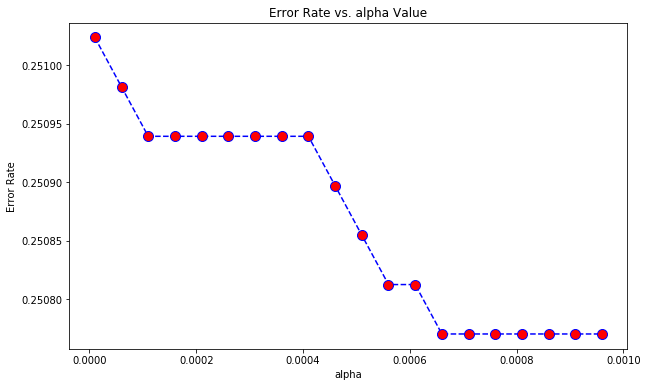

In [30]:
from sklearn.naive_bayes import MultinomialNB


myList = np.arange(0.00001, 0.001, 0.00005) #list(range(1,200))
optimal_alpha = find_optimal_k(X_train ,y_train,myList)

**Naive Bayes with Optimal alpha**

In [31]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(optimal_alpha)
model = nb.fit(X_train, y_train)


In [32]:
predtfidf = (model.predict(X_test))

In [33]:
predtfidfprob = (model.predict_proba(X_test))

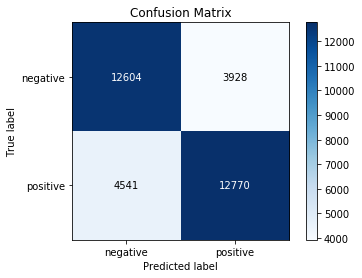

In [34]:
skplt.plot_confusion_matrix(y_test ,predtfidf)

In [35]:
print(classification_report(y_test ,predtfidf))

             precision    recall  f1-score   support

   negative       0.74      0.76      0.75     16532
   positive       0.76      0.74      0.75     17311

avg / total       0.75      0.75      0.75     33843



In [36]:
print("Accuracy for Naive Bayes model with tf-id is ",round(accuracy_score(y_test ,predtfidf),3))

Accuracy for Naive Bayes model with tf-id is  0.75


**Feature Importance**

In [37]:
tfidf_feat = tf_idf_vec.get_feature_names()

In [38]:
y_train.value_counts()

positive    44101
negative    34867
Name: Score, dtype: int64

In [39]:
df = pd.DataFrame(model.feature_log_prob_,columns=tfidf_feat)
df1_transposed = df.T
fe_tfidf_pos = df1_transposed[1].sort_values(ascending = False)[0:10] ##Positive
fe_tfidf_neg = df1_transposed[0].sort_values(ascending = False)[0:10] ##Negative

**Top 10 words found in Negative reviews with high probability**

In [40]:
fe_tfidf_neg

tast         -6.422468
like         -6.494458
product      -6.641878
would        -6.688242
one          -6.762274
tri          -6.805366
disappoint   -6.869297
buy          -6.889540
flavor       -6.889903
dont         -6.901973
Name: 0, dtype: float64

**Top 10 words found in positive reviews with high probability**

In [41]:
fe_tfidf_pos

great    -6.478753
love     -6.484903
good     -6.561251
like     -6.682222
use      -6.721935
make     -6.741705
tast     -6.746683
flavor   -6.750526
one      -6.785264
best     -6.816335
Name: 1, dtype: float64

# 5 Observation

**At the end of the Analysis we have two Naive Bayes model to compare with different Feature generation techniques, one with BoW and second with tf-idf. 
**


|      | Optimal Alpha | Accuracy|
|------| --------------|--------|
| BoW  | 0.000410|0.754 |
| tf-idf  |0.00066 |0.75|

By comparing accuracy of models it's clear that both the model have equal accuracy.


In [42]:
from sklearn.preprocessing import label_binarize
# Binarize the output
y_tfidf = label_binarize(y_test, classes= ["negative","positive","x"])[:,:-1]
n_classes = y_tfidf.shape[1]

In [43]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_tfidf[:, i], predtfidfprob[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
    
# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_tfidf.ravel(), predtfidfprob.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

# First aggregate all false positive rates
all_fpr2 = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

from scipy import interp
# Then interpolate all ROC curves at this points
mean_tpr2 = np.zeros_like(all_fpr2)
for i in range(n_classes):
    mean_tpr2 += interp(all_fpr2, fpr2[i], tpr2[i])
    
# Finally average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = all_fpr2
tpr2["macro"] = mean_tpr2
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

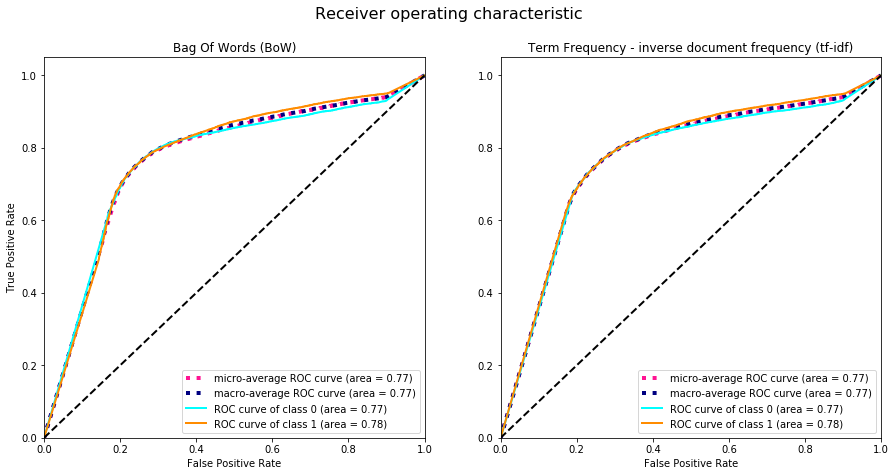

In [44]:
from itertools import cycle
lw = 2
f, (ax1 , ax2) = plt.subplots(1,2, sharex=True ,figsize=(15,7))
##axarr[1].figure(figsize=(10,8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


ax1.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4, )

ax1.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax1.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax1.plot([0, 1], [0, 1], 'k--', lw=lw)
#ax1.axis([4, 8, 8, 20])
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.title.set_text('Bag Of Words (BoW)')
ax1.legend(loc="lower right")


ax2.plot(fpr2["micro"], tpr2["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

ax2.plot(fpr2["macro"], tpr2["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax2.plot(fpr2[i], tpr2[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc2[i]))

ax2.plot([0, 1], [0, 1], 'k--', lw=lw)
# ax2.axis([4, 8, 8, 20])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
#ax2.set_ylabel('True Positive Rate')
ax2.title.set_text('Term Frequency - inverse document frequency (tf-idf)')

plt.suptitle('Receiver operating characteristic', fontsize=16)

ax2.legend(loc="lower right")



**ROC curve for both the model is sensible and indecates that both the model are equally powerful in terms of accuracy of prediction. AUC for the positive and negative reviews data point is more than 75% for both the model.**